In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes (1).csv


In [45]:
df = pd.read_csv("diabetes.csv", index_col=0)
df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1


In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler()

In [48]:
scaler.fit(df.drop('Outcome',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [49]:
scaled_features = scaler.transform(df.drop('Outcome',axis=1))

In [50]:
scaled_features

array([[ 0.84832379,  0.14964075,  0.90726993, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-1.12339636, -0.16054575,  0.53090156, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.94372388, -0.26394125, -1.28821221, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.00330087,  0.14964075,  0.15453319, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [ 0.1597866 , -0.47073225, -1.28821221, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.8730192 ,  0.04624525,  0.65635768, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [51]:
df.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [52]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X = df_feat
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
knn = KNeighborsClassifier(n_neighbors=1) 

In [57]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [58]:
pred = knn.predict(X_test)

In [59]:
pred

array([1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1])

In [60]:
from sklearn.metrics import classification_report, confusion_matrix

In [61]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[116  34]
 [ 35  46]]
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       150
           1       0.57      0.57      0.57        81

    accuracy                           0.70       231
   macro avg       0.67      0.67      0.67       231
weighted avg       0.70      0.70      0.70       231



In [63]:
error_rate = []   # elbow method to find out better k value

for i in range(1,40): 

  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

In [64]:
plt.figure(figsize=(10,6)) 

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

Text(0, 0.5, 'Error')

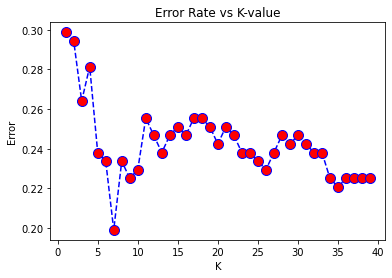

In [65]:
plt.plot(range(1,40),error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K-value')
plt.xlabel('K')
plt.ylabel('Error')

In [66]:
knn = KNeighborsClassifier(n_neighbors=7) 
knn.fit(X_train, y_train)
pred = knn.predict(X_test) 
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[133  17]
 [ 29  52]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       150
           1       0.75      0.64      0.69        81

    accuracy                           0.80       231
   macro avg       0.79      0.76      0.77       231
weighted avg       0.80      0.80      0.80       231

